<a href="https://colab.research.google.com/github/asmaadili/InternIntelligence_Projects/blob/main/Intern_Intelligence_1_Predictive_Analytics_Model(predicting_climate_change).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# resources

# Trends in Atmospheric Carbon Dioxide (CO2): Globally averaged marine surface annual mean data
# https://gml.noaa.gov/ccgg/trends/gl_data.html

# Urban population
# https://data.worldbank.org/indicator/SP.URB.TOTL.IN.ZS

# climate change
# https://data.worldbank.org/topic/climate-change



#combined datasets after tranforming and cleaning
# https://docs.google.com/spreadsheets/d/1O7JMQ1HfuTEtrGKIdMK_yYKoBWSuAQc8/edit?usp=sharing&ouid=104945734547202308697&rtpof=true&sd=true


In [3]:
import pandas as pd
import numpy as np
import os


In [4]:
# global population-related statistics
population = pd.read_excel('datasets.xlsx', sheet_name='new_population_data')


#Temperature change with respect to a baseline climatology, corresponding to the period 1951-1980
temperature_change = pd.read_excel('datasets.xlsx', sheet_name= 'temperature_change')

#annaul mean od co2 average
co2_anmean = pd.read_excel('datasets.xlsx', sheet_name= 'co2_anmean')

In [5]:
population.head(20)

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Urban population (% of total population),Region,IncomeGroup
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1961,50.761,Latin America & Caribbean,High income
1,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1962,50.746,Latin America & Caribbean,High income
2,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1963,50.730,Latin America & Caribbean,High income
3,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1964,50.715,Latin America & Caribbean,High income
4,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1965,50.700,Latin America & Caribbean,High income
5,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1966,50.685,Latin America & Caribbean,High income
6,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1967,50.670,Latin America & Caribbean,High income
7,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1968,50.654,Latin America & Caribbean,High income
8,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1969,50.639,Latin America & Caribbean,High income
9,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1970,50.624,Latin America & Caribbean,High income


In [6]:
temperature_change.head()

,Country,ISO2,ISO3,Indicator,Unit,Year,Temperature change
0,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1961,-0.126
1,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1962,-0.173
2,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1963,0.844
3,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1964,-0.751
4,"Afghanistan, Islamic Rep. of",AF,AFG,Temperature change with respect to a baseline ...,Degree Celsius,1965,-0.220


In [7]:
co2_anmean.head(5)

,Year,mean,unc
0,1959,315.98,0.12
1,1960,316.91,0.12
2,1961,317.64,0.12
3,1962,318.45,0.12
4,1963,318.99,0.12


In [8]:
temp_change = temperature_change.rename(columns={'ISO3': 'Country Code'})

In [9]:
df3= pd.merge(population,temp_change, on= ['Country Code', 'Year'], how='inner')

In [10]:
df = pd.merge(df3, co2_anmean, on="Year", how="inner") #merge the whole datsets with co2_anmean

In [11]:
df = df.rename(columns={'mean': 'Co2_mean', 'unc': 'co2_unc'})

In [12]:
pd.reset_option('display.max_rows')
pd.reset_option('display.max_columns')
df

,Country Name,Country Code,Indicator Name,Indicator Code,Year,Urban population (% of total population),Region,IncomeGroup,Country,ISO2,Indicator,Unit,Temperature change,Co2_mean,co2_unc
0,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1961,50.761,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,-0.237,317.64,0.12
1,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1962,50.746,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,0.100,318.45,0.12
2,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1963,50.730,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,0.020,318.99,0.12
3,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1964,50.715,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,0.212,319.62,0.12
4,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,1965,50.700,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,-0.430,320.04,0.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11747,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2019,32.210,Sub-Saharan Africa,Lower middle income,Zimbabwe,ZW,Temperature change with respect to a baseline ...,Degree Celsius,1.199,410.08,0.08
11748,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2020,32.242,Sub-Saharan Africa,Lower middle income,Zimbabwe,ZW,Temperature change with respect to a baseline ...,Degree Celsius,0.581,412.44,0.07
11749,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2021,32.303,Sub-Saharan Africa,Lower middle income,Zimbabwe,ZW,Temperature change with respect to a baseline ...,Degree Celsius,0.109,414.70,0.07
11750,Zimbabwe,ZWE,Urban population (% of total population),SP.URB.TOTL.IN.ZS,2022,32.395,Sub-Saharan Africa,Lower middle income,Zimbabwe,ZW,Temperature change with respect to a baseline ...,Degree Celsius,-0.251,417.08,0.08


In [14]:
import os
print(os.getcwd())


/content


In [16]:
#downloading rhe merged dataset
df.to_excel('/content/output_.xlsx', index=False)
print("File saved to /content/output_.xlsx")


File saved to /content/output_.xlsx


In [17]:
from google.colab import files

files.download('/content/output_.xlsx')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
df.isna().sum()

,0
Country Name,0
Country Code,0
Indicator Name,0
Indicator Code,0
Year,0
Urban population (% of total population),0
Region,63
IncomeGroup,126
Country,0
ISO2,126


In [19]:
df = df.drop(columns=['ISO2', 'Indicator','Indicator Code','Indicator Name' ,'Unit']) #drop unnecessary columns

In [20]:
df.isna().sum()

,0
Country Name,0
Country Code,0
Year,0
Urban population (% of total population),0
Region,63
IncomeGroup,126
Country,0
Temperature change,0
Co2_mean,0
co2_unc,0


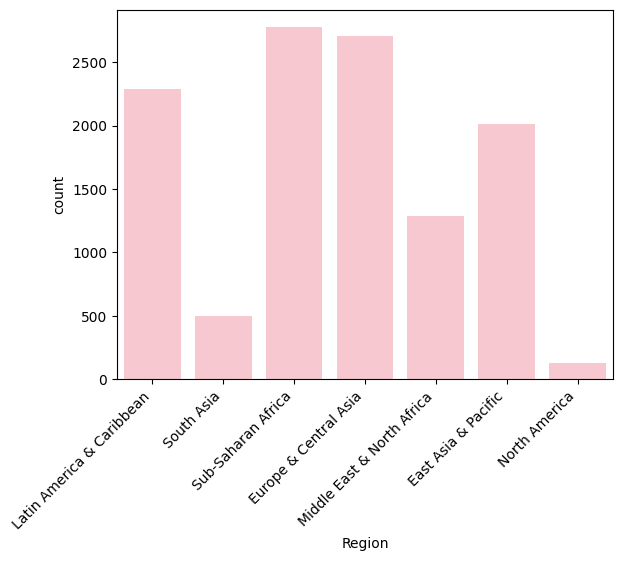

In [21]:
!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="Region", data=df, color="pink")
plt.xticks(rotation=45, ha='right')

plt.show()

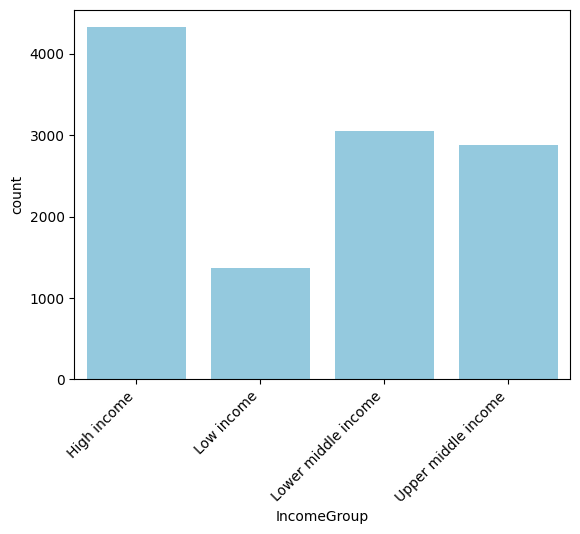

In [22]:
#visualize important features

!pip install seaborn
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x="IncomeGroup", data=df, color='skyblue')
plt.xticks(rotation=45, ha='right')

plt.show()

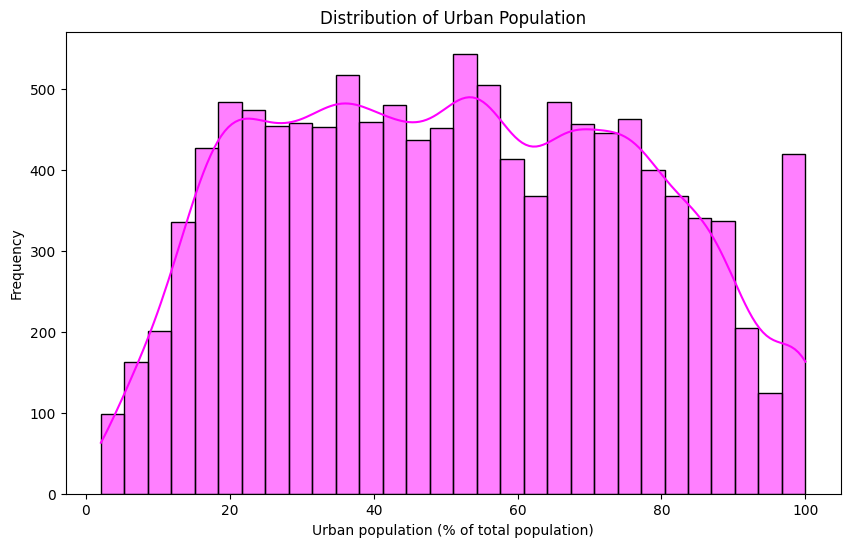

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualize the distribution of the urban population column
plt.figure(figsize=(10, 6))

# Histogram and KDE plot
sns.histplot(df['Urban population (% of total population)'], kde=True, bins=30, color='magenta')

# Add titles and labels
plt.title('Distribution of Urban Population')
plt.xlabel('Urban population (% of total population)')
plt.ylabel('Frequency')

# Show the plot
plt.show()

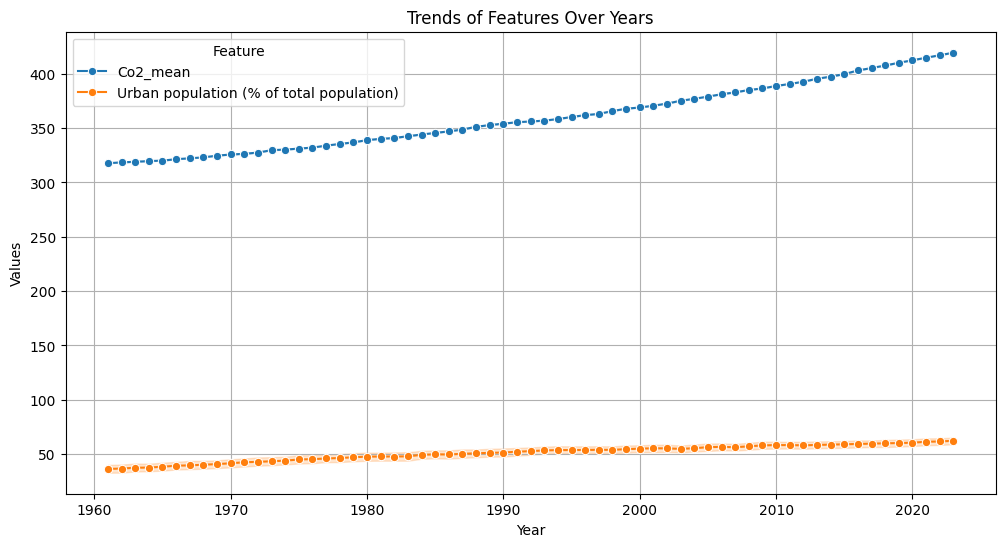

In [24]:
import seaborn as sns

df_features = df.melt(id_vars='Year', value_vars=['Co2_mean', 'Urban population (% of total population)'],
                  var_name='Feature', value_name='Value')

plt.figure(figsize=(12,6))
sns.lineplot(data=df_features, x='Year', y='Value', hue='Feature', marker='o')

plt.xlabel('Year')
plt.ylabel('Values')
plt.title('Trends of Features Over Years')
plt.grid(True)

plt.show()


In [25]:
df.describe() # no outliers or inconsistint data

,Year,Urban population (% of total population),Temperature change,Co2_mean,co2_unc
count,11752.000000,11752.000000,11752.000000,11752.000000,11752.000000
mean,1993.086624,51.395652,0.564510,361.752935,0.077549
std,18.185505,25.115210,0.675699,30.197702,0.029705
min,1961.000000,2.115000,-2.421000,317.640000,0.030000
25%,1977.000000,30.509500,0.074000,333.840000,0.050000
50%,1994.000000,50.959500,0.494500,358.330000,0.070000
75%,2009.000000,71.968250,0.992250,386.500000,0.120000
max,2023.000000,100.000000,3.669000,419.330000,0.120000


In [26]:
import plotly.express as px
import pandas as pd

In [29]:
#group analysis by grouping the IncomeGroup and the Region

grouped_Income = df.groupby('IncomeGroup')[['Urban population (% of total population)', 'Temperature change']].mean()

grouped_Income

#there is a strong correlation between high income countries and higher temperature changes..

,Urban population (% of total population),Temperature change
IncomeGroup,,
High income,70.571615,0.613173
Low income,27.062716,0.554412
Lower middle income,34.462233,0.491406
Upper middle income,51.627634,0.576810


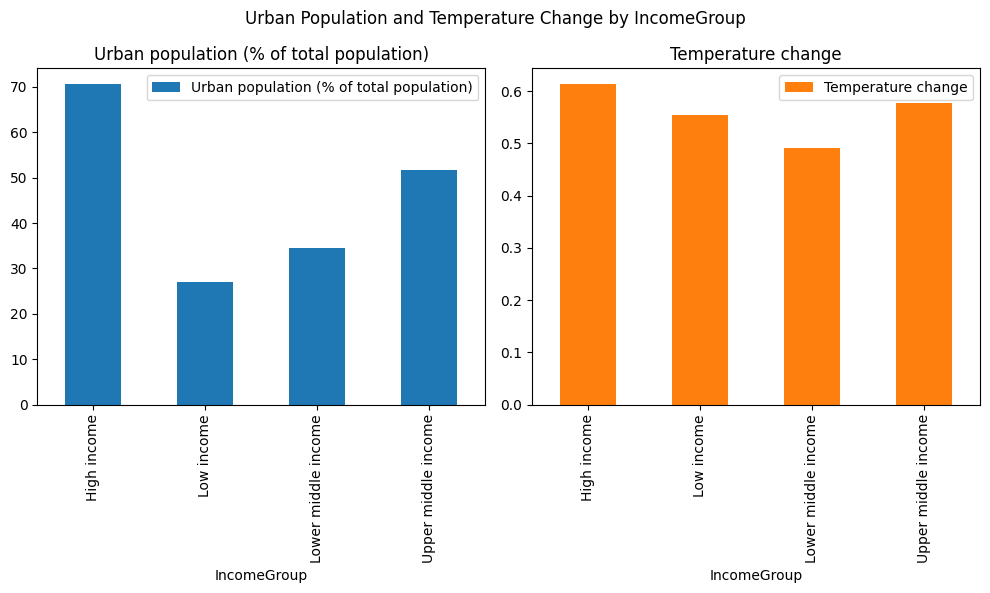

In [30]:
grouped_Income.plot(kind='bar', figsize=(10,6), subplots=True, layout=(1, 2), legend=True)

plt.suptitle('Urban Population and Temperature Change by IncomeGroup')
plt.tight_layout()
plt.show()


In [31]:
grouped_Region = df.groupby('Region')[['Urban population (% of total population)', 'Temperature change']].mean()

grouped_Region

,Urban population (% of total population),Temperature change
Region,,
East Asia & Pacific,48.590124,0.428153
Europe & Central Asia,65.612188,0.825694
Latin America & Caribbean,56.580387,0.460279
Middle East & North Africa,68.424214,0.565343
North America,77.256190,0.596095
South Asia,21.700028,0.397586
Sub-Saharan Africa,31.679097,0.521896


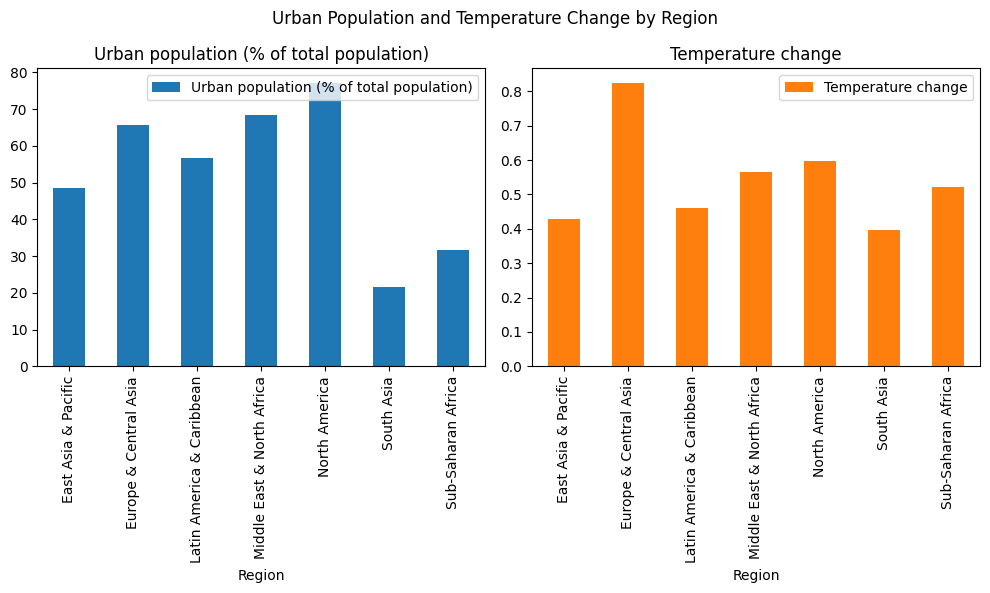

In [32]:
grouped_Region.plot(kind='bar', figsize=(10,6), subplots=True, layout=(1, 2), legend=True)

plt.suptitle('Urban Population and Temperature Change by Region')
plt.tight_layout()
plt.show()


In [33]:
#one hot encoded df:

df1 = pd.get_dummies(df, columns=["IncomeGroup", "Region" ], drop_first=True)

df1 = df1.drop(columns=["Country", "Country Name", "Country Code"])

df1 = df1.sort_values(by="Year")

df1.head(20)

,Year,Urban population (% of total population),Temperature change,Co2_mean,co2_unc,IncomeGroup_Low income,IncomeGroup_Lower middle income,IncomeGroup_Upper middle income,Region_Europe & Central Asia,Region_Latin America & Caribbean,Region_Middle East & North Africa,Region_North America,Region_South Asia,Region_Sub-Saharan Africa
0,1961,50.761,-0.237,317.64,0.12,False,False,False,False,True,False,False,False,False
8591,1961,48.527,1.401,317.64,0.12,False,False,False,True,False,False,False,False,False
10090,1961,37.399,-0.041,317.64,0.12,True,False,False,False,False,True,False,False,False
6140,1961,28.197,-0.417,317.64,0.12,False,False,True,False,False,True,False,False,False
3913,1961,10.936,-0.159,317.64,0.12,False,True,False,False,False,False,False,False,True
6203,1961,21.696,0.290,317.64,0.12,False,False,True,False,True,False,False,False,False
8528,1961,4.024,-0.193,317.64,0.12,False,True,False,False,False,False,False,False,False
9374,1961,6.038,0.208,317.64,0.12,False,True,False,False,False,False,False,False,False
7912,1961,60.020,0.850,317.64,0.12,False,False,False,True,False,False,False,False,False
3850,1961,100.000,0.598,317.64,0.12,False,False,False,True,False,False,False,False,False


In [34]:
#the correlation of the features with target
dff = df.drop(columns=["Region","Country","Country Code","Country Name", "IncomeGroup"])

pd.set_option('display.max_rows', None)
correlation_matrix = dff.corr()

feature_importance = correlation_matrix["Temperature change"].abs().sort_values(ascending=False)
print("Features sorted by importance to target:\n", feature_importance)


Features sorted by importance to target:
 Temperature change                          1.000000
Co2_mean                                    0.736538
Year                                        0.723940
co2_unc                                     0.443371
Urban population (% of total population)    0.256134
Name: Temperature change, dtype: float64


In [39]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [40]:
from sklearn.model_selection import TimeSeriesSplit
X = df1.drop(columns=["Year"])  # Example: all columns except 'Year' are features
y = df1["Temperature change"]

ts_split = TimeSeriesSplit(n_splits=5)  # Specify the number of splits

for train_index, test_index in ts_split.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    print("TRAIN indices:", train_index)
    print("TEST indices:", test_index)
    print("X_train:", X_train)
    print("X_test:", X_test)

Streaming output truncated to the last 5000 lines.
7906                             False                         False   
5541                              True                          True   
1363                             False                         False   
9137                             False                          True   
11746                            False                         False   
5323                             False                          True   
1489                             False                         False   
7969                             False                          True   
10352                             True                         False   
2934                             False                          True   
5819                             False                         False   
5134                              True                         False   
9074                             False                         False   
5760         

In [44]:
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import MinMaxScaler, StandardScaler


In [45]:
models = {"svm_model" : SVR(),
"rf_model" : RandomForestRegressor(n_estimators=100),
"dt_model": DecisionTreeRegressor(max_depth=5)}

In [46]:
scalers = {
    "None": None,  # no scaling
    "MinMaxScaler": MinMaxScaler(),
    "StandardScaler": StandardScaler()
}

In [47]:
results_list = []


for scaler_name, scaler in scalers.items(): # to loop over scalers and models
    if scaler_name == "None":
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        scaler.set_output(transform="pandas")
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():

        model.fit(X_train_scaled, y_train)
        y_pred = model.predict(X_test_scaled)


        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        results_list.append({
            "Model": model_name,
            "Scaler": scaler_name,
            "MSE": mse,
            "R-squared": r2
        })

results = pd.DataFrame(results_list)

results

,Model,Scaler,MSE,R-squared
0,svm_model,None,0.270284,0.107932
1,rf_model,None,0.000782,0.997420
2,dt_model,None,0.005739,0.981057
3,svm_model,MinMaxScaler,0.026510,0.912504
4,rf_model,MinMaxScaler,0.000863,0.997153
5,dt_model,MinMaxScaler,0.005739,0.981057
6,svm_model,StandardScaler,0.022502,0.925733
7,rf_model,StandardScaler,0.000685,0.997739
8,dt_model,StandardScaler,0.005739,0.981057


In [49]:
# check for overfitting
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

results_list = []

for scaler_name, scaler in scalers.items():  # Loop over scalers and models
    if scaler_name == "None":
        X_train_scaled = X_train
        X_test_scaled = X_test
    else:
        scaler.set_output(transform="pandas")  # Use pandas output for scalers
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)

    for model_name, model in models.items():
        model.fit(X_train_scaled, y_train) #train model

        y_train_pred = model.predict(X_train_scaled)
        y_test_pred = model.predict(X_test_scaled)

        train_mse = mean_squared_error(y_train, y_train_pred)  #metrics for training set
        train_r2 = r2_score(y_train, y_train_pred)

        test_mse = mean_squared_error(y_test, y_test_pred) ##metrics for testing set
        test_r2 = r2_score(y_test, y_test_pred)

        results_list.append({
            "Model": model_name,
            "Scaler": scaler_name,
            "Train MSE": train_mse,
            "Train R-squared": train_r2,
            "Test MSE": test_mse,
            "Test R-squared": test_r2
        })

results = pd.DataFrame(results_list)
results


,Model,Scaler,Train MSE,Train R-squared,Test MSE,Test R-squared
0,svm_model,None,0.169849,0.479920,0.270284,0.107932
1,rf_model,None,0.000010,0.999969,0.000676,0.997767
2,dt_model,None,0.000999,0.996942,0.005739,0.981057
3,svm_model,MinMaxScaler,0.002105,0.993554,0.026510,0.912504
4,rf_model,MinMaxScaler,0.000007,0.999979,0.000603,0.998009
5,dt_model,MinMaxScaler,0.000999,0.996942,0.005739,0.981057
6,svm_model,StandardScaler,0.002253,0.993103,0.022502,0.925733
7,rf_model,StandardScaler,0.000008,0.999975,0.000718,0.997631
8,dt_model,StandardScaler,0.000999,0.996942,0.005739,0.981057


In [ ]:
#train on ARIMA model

In [71]:
data = pd.read_excel('output_.xlsx', parse_dates=['Year'], index_col='Year')

In [72]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

# Fit an ARIMA model
# You may want to explore the appropriate order (p, d, q) for your data.
model = sm.tsa.ARIMA(data['Temperature change'], order=(5, 1, 0))  # Example order
fitted_model = model.fit()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsm

In [73]:
data.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,Urban population (% of total population),Region,IncomeGroup,Country,ISO2,Indicator,Unit,Temperature change,Co2_mean,co2_unc
Year,,,,,,,,,,,,,,
1961-01-01,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.761,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,-0.237,317.64,0.12
1962-01-01,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.746,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,0.100,318.45,0.12
1963-01-01,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.730,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,0.020,318.99,0.12
1964-01-01,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.715,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,0.212,319.62,0.12
1965-01-01,Aruba,ABW,Urban population (% of total population),SP.URB.TOTL.IN.ZS,50.700,Latin America & Caribbean,High income,"Aruba, Kingdom of the Netherlands",AW,Temperature change with respect to a baseline ...,Degree Celsius,-0.430,320.04,0.12


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-74-4716c5c82446>:15: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='Y') # Create an index for the forecast period


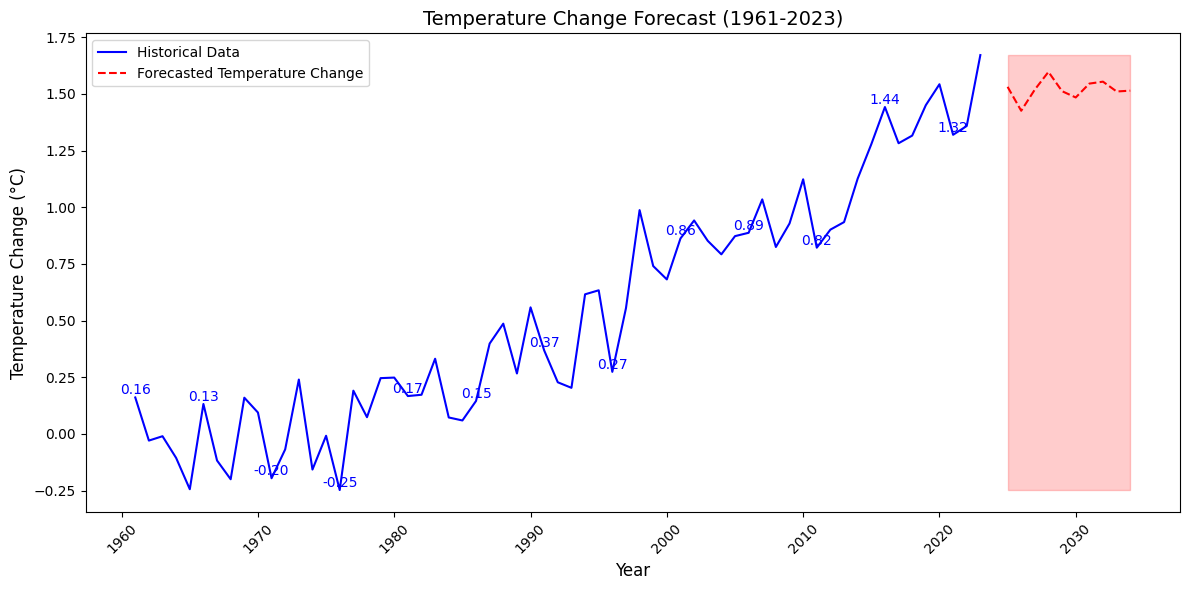

In [74]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

# data = pd.read_excel('output1(1).xlsx', parse_dates=['Year'], index_col='Year')

data_ = data.groupby('Year')['Temperature change'].mean()

model = sm.tsa.ARIMA(data_, order=(5, 1, 0))
fitted_model = model.fit()

forecast_years = 10
forecast_values = fitted_model.forecast(steps=forecast_years)

forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='Y') # Create an index for the forecast period

plt.figure(figsize=(12, 6))  # the historical data
plt.plot(data_.index, data_, label='Historical Data', color='blue')

plt.plot(forecast_index, forecast_values, label='Forecasted Temperature Change', color='red', linestyle='--')  # Plot the forecasted values

plt.fill_between(forecast_index, min(data_), max(data_), color='red', alpha=0.2) # Shade the forecast area

for year in data_.index[::5]:  # to skip 5 years at a time
    plt.text(year, data_[year], f'{data_[year]:.2f}', color='blue', fontsize=10, ha='center', va='bottom')

plt.title('Temperature Change Forecast (1961-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Change (°C)', fontsize=12)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()
plt.show()


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
<ipython-input-79-40b88faaa323>:16: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='Y') # Create an index for the forecast period (e.g., the next 10 years)
<ipython-input-79-40b88faaa323>:37: FutureWarning: Series.__ge

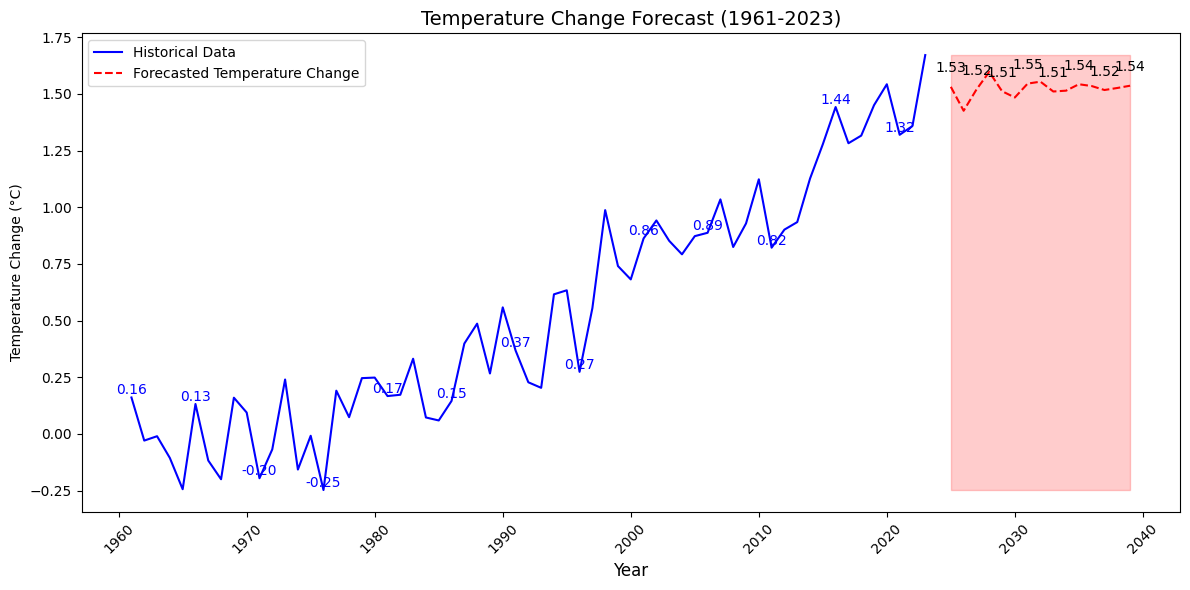

In [79]:
#add values to forecast years

import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

data = pd.read_excel('output_.xlsx', parse_dates=['Year'], index_col='Year')
data = data.groupby('Year')['Temperature change'].mean()

model = sm.tsa.ARIMA(data, order=(5, 1, 0))
fitted_model = model.fit()

forecast_years = 15
forecast_values = fitted_model.forecast(steps=forecast_years)

forecast_index = pd.date_range(start=data.index[-1] + pd.DateOffset(years=1), periods=forecast_years, freq='Y') # Create an index for the forecast period (e.g., the next 10 years)

plt.figure(figsize=(12, 6))
plt.plot(data.index, data, label='Historical Data', color='blue')

plt.plot(forecast_index, forecast_values, label='Forecasted Temperature Change', color='red', linestyle='--')

plt.fill_between(forecast_index, min(data), max(data), color='red', alpha=0.2)


##########################
# Add values at every 5th year on the historical data line with space
for i, year in enumerate(data.index):
    if i % 5 == 0:  # Annotate every 5th year to create space
        plt.text(year, data[year], f'{data[year]:.2f}', color='blue', fontsize=10, ha='center', va='bottom',
                 verticalalignment='bottom', horizontalalignment='center')

# Add values to the forecasted line with space
for i, year in enumerate(forecast_index):  # Iterate through forecast years
    if i % 2 == 0:  # Annotate every second forecasted year to add space
        offset = 0.05 if i % 2 == 0 else -0.05  # Alternate offsets to avoid overlap
        plt.text(year, forecast_values[i] + offset, f'{forecast_values[i]:.2f}', color='black', fontsize=10, ha='center', va='bottom')

plt.title('Temperature Change Forecast (1961-2023)', fontsize=14)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Temperature Change (°C)', fontsize=10)
plt.xticks(rotation=45)
plt.legend()

plt.tight_layout()

plt.show()
